In [2]:
#Import the libraries in Python
import numpy as np
import seaborn as sns
import random
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools

### Data Loading

In [3]:
gen = ImageDataGenerator(rescale = 1./255, rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08, validation_split=0.2)

train_gen = gen.flow_from_directory(r'C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\17. Capstone Project 4\natural_images',
                                                 target_size = (150, 150),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 seed = 42,
                                                 class_mode = 'categorical',subset='training')
test_gen  = gen.flow_from_directory(r'C:\Users\kerby\Desktop\NTUC Learning Hub\Data Analytics Course\17. Capstone Project 4\natural_images',
                                                 target_size = (150, 150),
                                                 color_mode = 'rgb',
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 seed = 42,
                                                 class_mode = 'categorical',subset='validation')


Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


In [4]:
np.array(train_gen[0][0]).shape

(32, 150, 150, 3)

In [5]:
np.array(train_gen[0][0][0]).shape

(150, 150, 3)

In [6]:
np.array(train_gen[0][1][0]).shape

(8,)

In [8]:
train_gen[0][0][0]

array([[[0.7192682 , 0.6604447 , 0.58440125],
        [0.71823764, 0.6594141 , 0.58268356],
        [0.7172071 , 0.6583835 , 0.580966  ],
        ...,
        [0.1913797 , 0.18198219, 0.10740106],
        [0.185123  , 0.16943671, 0.12629946],
        [0.1725775 , 0.15689123, 0.11375397]],

       [[0.7094666 , 0.65064305, 0.57613325],
        [0.7108407 , 0.6520172 , 0.5775074 ],
        [0.71221477, 0.65339124, 0.57888144],
        ...,
        [0.18564197, 0.16450575, 0.11047409],
        [0.17580757, 0.15695736, 0.12963977],
        [0.16948289, 0.1509762 , 0.12424087]],

       [[0.7029861 , 0.64416254, 0.56965274],
        [0.7033296 , 0.6445061 , 0.5699963 ],
        [0.7036732 , 0.64484966, 0.5703398 ],
        ...,
        [0.16163729, 0.1329182 , 0.09929758],
        [0.16005868, 0.14045084, 0.11692141],
        [0.167157  , 0.14754915, 0.12521207]],

       ...,

       [[0.5921569 , 0.5568628 , 0.5294118 ],
        [0.5921569 , 0.5568628 , 0.5294118 ],
        [0.5921569 , 0

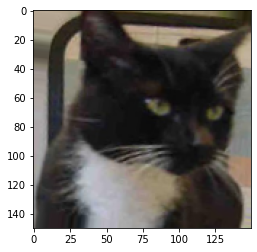

In [7]:
plt.imshow(train_gen[0][0][0])

### Building a "Deep" Convolutional Neural Network

In [7]:
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(128))                                # 128 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(8))                                  # final 8 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0

In [8]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

history = model.fit_generator(train_gen, 
                              steps_per_epoch=5522//32, 
                              epochs=15, 
                              verbose=1, 
                              validation_data=test_gen, 
                              validation_steps=1377//32)

Epoch 1/15
172/172 [==============================] - 409s 2s/step - loss: 0.4460 - accuracy: 0.8408 - val_loss: 3.6793 - val_accuracy: 0.2093
Epoch 2/15
172/172 [==============================] - 409s 2s/step - loss: 0.3286 - accuracy: 0.8796 - val_loss: 1.1689 - val_accuracy: 0.5988
Epoch 3/15
172/172 [==============================] - 407s 2s/step - loss: 0.2665 - accuracy: 0.9071 - val_loss: 0.7316 - val_accuracy: 0.7282
Epoch 4/15
172/172 [==============================] - 403s 2s/step - loss: 0.2327 - accuracy: 0.9142 - val_loss: 0.9793 - val_accuracy: 0.6839
Epoch 5/15
172/172 [==============================] - 829s 5s/step - loss: 0.2018 - accuracy: 0.9273 - val_loss: 0.9815 - val_accuracy: 0.6875
Epoch 6/15
172/172 [==============================] - 399s 2s/step - loss: 0.1780 - accuracy: 0.9333 - val_loss: 0.4567 - val_accuracy: 0.8249
Epoch 7/15
172/172 [==============================] - 398s 2s/step - loss: 0.1689 - accuracy: 0.9395 - val_loss: 0.4301 - val_accuracy: 0.8539

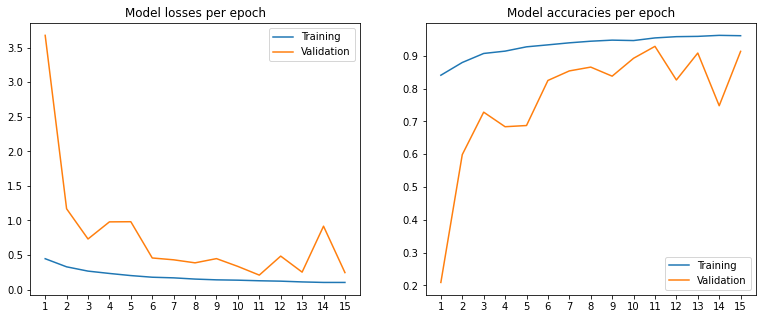

In [11]:
# Let's plot the model accuracy and loss curves during training
epoch_range = range(1, len(history.history['loss']) + 1)
plt.subplots(figsize=(13,5))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("Model losses per epoch")
plt.xticks(epoch_range)
plt.legend(['Training', 'Validation'])
plt.subplot(1,2,2)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title("Model accuracies per epoch")
plt.xticks(epoch_range)
plt.legend(['Training', 'Validation'])

### Test Accuracy

In [12]:
score = model.evaluate(test_gen)
print('Test score:', score[0])
print('Test accuracy:', score[1])

44/44 [==============================] - 19s 439ms/step - loss: 0.2507 - accuracy: 0.9114
Test score: 0.2506970167160034
Test accuracy: 0.9114015698432922


In [13]:
classes = ['airplane','car','cat','dog','flower','fruit','motorbike','person']

In [14]:
x_test = []
y_test = []

for i in range(len(test_gen)):
    x_test += list(test_gen[i][0])
    y_test += list(test_gen[i][1]) 

In [15]:
x_test = np.array(x_test)
x_test.shape

(1377, 150, 150, 3)

In [16]:
y_test = np.array(y_test)
y_test.shape

(1377, 8)

In [17]:
y_pred = model.predict(x_test)
y_pred_idx = np.argmax(y_pred, axis=-1)
y_test_idx = np.argmax(y_test, axis=1)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_idx, y_pred_idx))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89       145
           1       0.99      0.93      0.96       193
           2       0.79      0.86      0.82       177
           3       0.72      0.79      0.75       140
           4       0.96      0.93      0.95       168
           5       0.96      1.00      0.98       200
           6       0.97      0.98      0.98       157
           7       0.98      0.99      0.98       197

    accuracy                           0.92      1377
   macro avg       0.92      0.91      0.91      1377
weighted avg       0.92      0.92      0.92      1377



In [19]:
print(confusion_matrix(y_test_idx, y_pred_idx))

[[116   1   9   5   4   5   3   2]
 [  0 180   1   8   1   1   1   1]
 [  0   0 152  25   0   0   0   0]
 [  0   0  26 111   1   1   0   1]
 [  1   0   5   4 157   0   0   1]
 [  0   0   0   0   0 200   0   0]
 [  0   0   0   2   0   1 154   0]
 [  0   0   0   0   0   1   0 196]]


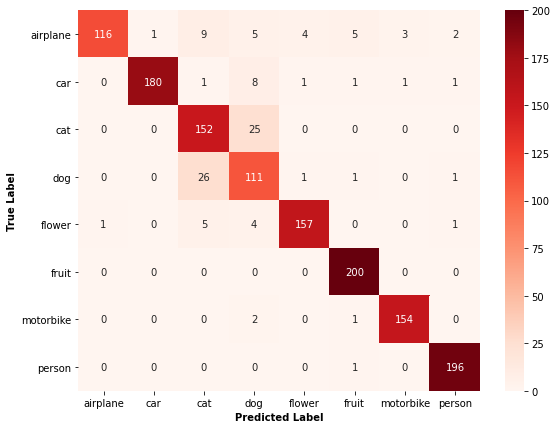

In [20]:
# Plot the confusion matrix using Seaborn library
plt.figure(figsize=(9,7))
_ = sns.heatmap(confusion_matrix(y_test_idx, y_pred_idx), 
                annot=True, annot_kws={"size":10}, fmt='d',
                cmap=plt.cm.Reds,
                xticklabels=classes, yticklabels=classes)
_ = plt.ylabel('True Label', fontweight='bold')
_ = plt.xlabel('Predicted Label', fontweight='bold')

### Visualizing the Predictions

In [21]:
classes = ['airplane','car','cat','dog','flower','fruit','motorbike','person']

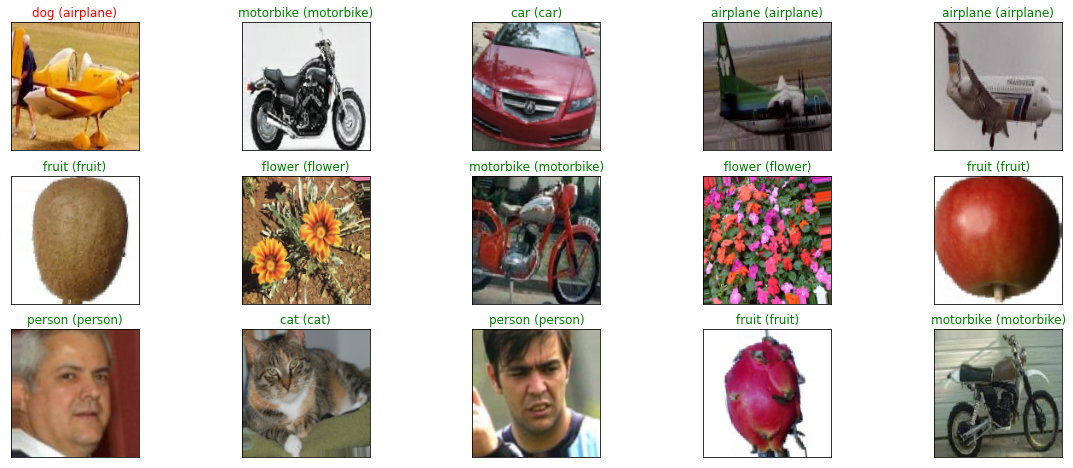

In [22]:
# Plot a random sample of test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(x_test[index])
    predict_index = np.argmax(y_pred[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(classes[predict_index], 
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### Test using Google Image

In [3]:
from PIL import Image
from numpy import asarray

In [4]:
def predict_pic(picture):
    """ takes in a jpg file --> 'pic.jpg' """
    
    image = Image.open(picture) #Load the image
    image_resize = np.array(image.resize((150,150))) #Resize the image
    plt.imshow(image_resize)
    image_resize_expand = np.expand_dims(image_resize, 0)
    
    image_pred = model.predict(image_resize_expand) #Calling out model
    image_pred_idx = int(np.argmax(image_pred, axis=-1))
    print('Predicted image is:', classes[image_pred_idx])
    


In [5]:
predict_pic('apple.jpg')

NameError: name 'np' is not defined

Predicted image is: fruit


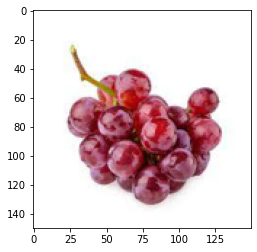

In [39]:
predict_pic('grape.jpg')

Predicted image is: flower


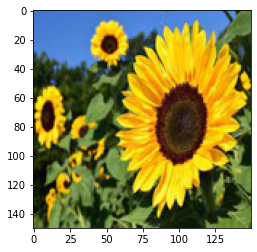

In [27]:
predict_pic('sunflower.jpg')

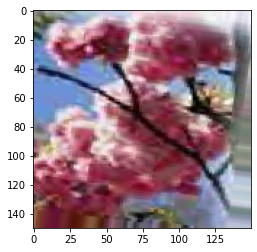

In [29]:
plt.imshow(test_gen[2][0][12])

In [30]:
image_pred = model.predict(np.expand_dims(test_gen[2][0][12],0)) 
image_pred_idx = int(np.argmax(image_pred, axis=-1))
print('Predicted image is:', classes[image_pred_idx])

Predicted image is: flower
